# Merging data
This notebook will merge all of the cleaned data into a single geodataframe. 

In [1]:
import pandas as pd
import geopandas as gpd
a = gpd.read_file("clean_data/attributes.shp")
lcff = pd.read_csv("clean_data/lcff.csv")
math = pd.read_csv("clean_data/math.csv")
ela = pd.read_csv("clean_data/ela.csv")
# importing cleaned data

## Shapefile/attribute and lcff (funding data) first

In [2]:
a.shape

(944, 70)

In [3]:
len(a["DistrictNa"].unique())

932

In [4]:
lcff.shape

(944, 8)

In [5]:
len(lcff["districtname"].unique())

932

What's going on here?

In [23]:
a[a.duplicated(['DistrictNa'])]

,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,DistrictNa,DistrictTy,GradeLow,GradeHigh,...,AbsentPct,GradCohort,GradPct,UCCSUReqMe,DropOutPct,EnrollCumu,SuspPct,SHAPE_Leng,SHAPE_Area,geometry
70,71,2018-19,0630480,0961945,9619450000000,El Dorado,Pioneer Union Elementary,Elementary,KG,08,...,17.6,NaN,NaN,NaN,NaN,333.0,5.4,237934.742453,9.835150e+08,"POLYGON ((-13375371.000 4669838.017, -13375392..."
136,137,2018-19,0629430,1262976,12629760000000,Humboldt,Pacific Union Elementary,Elementary,KG,08,...,11.8,NaN,NaN,NaN,NaN,644.0,2.3,51692.103483,7.297793e+07,"POLYGON ((-13810777.373 5000504.637, -13810767..."
227,228,2018-19,0630510,1663990,16639900000000,Kings,Pioneer Union Elementary,Elementary,KG,08,...,6.0,NaN,NaN,NaN,NaN,1679.0,2.8,49427.044003,6.870159e+07,"POLYGON ((-13317939.048 4349906.181, -13317958..."
532,533,2018-19,0626220,3667785,36677850000000,San Bernardino,Mountain View Elementary,Elementary,KG,08,...,9.6,NaN,NaN,NaN,NaN,2734.0,1.5,34774.773046,5.020143e+07,"POLYGON ((-13086531.430 4033294.563, -13086532..."
569,570,2018-19,0620790,3768189,37681890000000,San Diego,Lakeside Union Elementary,Elementary,KG,12,...,8.8,57.0,82.500000,85.099998,15.800000,6077.0,3.0,86220.894672,2.592272e+08,"POLYGON ((-13001030.826 3882933.249, -13001030..."
597,598,2018-19,0618840,3968544,39685440000000,San Joaquin,Jefferson Elementary,Elementary,KG,08,...,6.6,NaN,NaN,NaN,NaN,2466.0,2.5,99216.863881,5.693268e+08,"POLYGON ((-13513971.224 4538626.536, -13513954..."
625,626,2018-19,0618870,4168916,41689160000000,San Mateo,Jefferson Elementary,Elementary,KG,12,...,11.8,115.0,56.500000,29.200001,35.700001,7347.0,2.1,33746.539556,3.923115e+07,"POLYGON ((-13630098.493 4538301.494, -13630082..."
741,742,2018-19,0619230,4770367,47703670000000,Siskiyou,Junction Elementary,Elementary,KG,08,...,29.0,NaN,NaN,NaN,NaN,33.0,15.2,248946.208028,1.794471e+09,"POLYGON ((-13723104.814 5106620.770, -13723116..."
870,871,2018-19,0617520,5471944,54719440000000,Tulare,Hope Elementary,Elementary,KG,08,...,8.2,NaN,NaN,NaN,NaN,272.0,1.1,33601.734844,5.735138e+07,"POLYGON ((-13249006.012 4299908.635, -13249207..."
873,874,2018-19,0621570,5471985,54719850000000,Tulare,Liberty Elementary,Elementary,KG,08,...,2.6,NaN,NaN,NaN,NaN,674.0,0.4,31037.207135,5.015608e+07,"POLYGON ((-13278035.352 4338818.856, -13278035..."


Not sure pd.duplicated does what I think it does? Some of these are duplicates, but not all. Merging by CDS code should make this a non-issue.

In [6]:
s1 = set(a['DistrictNa'].unique())
s2 = set(lcff['districtname'].unique())

In [7]:
s1.difference(s2)

{'Aromas-San Juan Unified',
 'Live Oak',
 'Los Gatos-Saratoga Union High',
 'Menifee Union',
 'Oro Grande Elementary'}

In [8]:
s2.difference(s1)

{'Aromas - San Juan Unified',
 'Live Oak Elementary',
 'Los Gatos-Saratoga Joint Union High',
 'Menifee Union Elementary',
 'Oro Grande'}

Looks like the same districts, different naming conventions by data compilers.

In [9]:
replacements = dict(
    districts = {'Aromas - San Juan Unified':'Aromas-San Juan Unified',
                 'Los Gatos-Saratoga Joint Union High':'Los Gatos-Saratoga Union High',
                 'Menifee Union Elementary':'Menifee Union',
                 'Oro Grande':'Live Oak Elementary',
                })
# creating dictionary for replacement
a = a.replace(replacements)

In [10]:
a["CDSCode"] = a["CDSCode"].apply(pd.to_numeric)
# converting CDSCode to int to enable merge
t = pd.merge(a, lcff, left_on='CDSCode', right_on='cds', how='outer')
# merging

In [11]:
t

,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,DistrictNa,DistrictTy,GradeLow,GradeHigh,...,SHAPE_Area,geometry,Unnamed: 0,districtname,unduplicated_pupil_count,base_grant,supplemental_grant,concentration_grant,total_grants,cds
0,1,2018-19,0601770,0161119,1611190000000,Alameda,Alameda Unified,Unified,KG,12,...,4.733304e+07,"MULTIPOLYGON (((-13606221.352 4540862.002, -13...",10,Alameda Unified,0.3486,"75,938,983","5,294,466",-,"82,158,116",1611190000000
1,2,2018-19,0601860,0161127,1611270000000,Alameda,Albany City Unified,Unified,KG,12,...,7.161276e+06,"POLYGON ((-13612889.056 4565138.930, -13612894...",16,Albany City Unified,0.2833,"29,644,972","1,679,684",-,"31,352,540",1611270000000
2,3,2018-19,0604740,0161143,1611430000000,Alameda,Berkeley Unified,Unified,KG,12,...,4.376389e+07,"POLYGON ((-13609481.010 4565073.896, -13609481...",17,Berkeley Unified,0.3519,"78,556,532","5,528,808",-,"89,369,621",1611430000000
3,4,2018-19,0607800,0161150,1611500000000,Alameda,Castro Valley Unified,Unified,KG,12,...,2.833205e+08,"MULTIPOLYGON (((-13581537.591 4528171.452, -13...",19,Castro Valley Unified,0.2904,"74,911,585","4,350,864",-,"79,554,607",1611500000000
4,5,2018-19,0612630,0161168,1611680000000,Alameda,Emery Unified,Unified,KG,12,...,5.368212e+06,"POLYGON ((-13614035.309 4555653.898, -13614035...",20,Emery Unified,0.7953,"5,702,229","906,997","699,378","7,326,875",1611680000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,940,2018-19,0607260,5872728,58727280000000,Yuba,Camptonville Elementary,Elementary,KG,12,...,2.462935e+08,"POLYGON ((-13475637.801 4796756.168, -13475582...",2233,Camptonville Elementary,0.6988,"420,692","58,796","31,299","537,244",58727280000000
940,941,2018-19,0624090,5872736,58727360000000,Yuba,Marysville Joint Unified,Unified,KG,12,...,2.028548e+09,"POLYGON ((-13475637.801 4796756.168, -13475660...",2235,Marysville Joint Unified,0.8168,"76,193,862","12,447,028","10,164,261","100,261,913",58727360000000
941,942,2018-19,0631180,5872744,58727440000000,Yuba,Plumas Lake Elementary,Elementary,KG,08,...,1.626634e+08,"POLYGON ((-13526188.093 4719225.161, -13526285...",2238,Plumas Lake Elementary,0.3868,"10,261,440","793,825",-,"11,108,901",58727440000000
942,943,2018-19,0642330,5872751,58727510000000,Yuba,Wheatland,Elementary,KG,08,...,5.138135e+08,"POLYGON ((-13500775.523 4754748.024, -13500775...",2239,Wheatland,0.4783,"9,947,133","951,543",-,"11,234,349",58727510000000


need to create binary plot (non-null value for concentration grant & null) in following cell. Mapclassify?

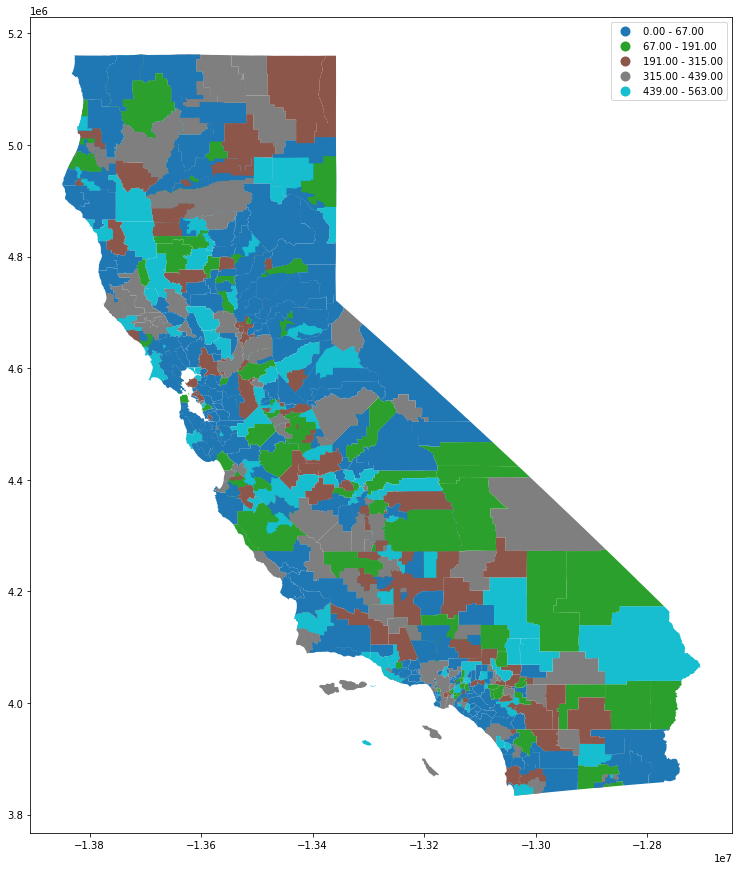

In [12]:
t.plot(
    column='concentration_grant',
    legend=True,
    figsize=(15, 15),
    scheme="fisher_jenks"
        )

## Merging with grades

In [13]:
math.head()

,Unnamed: 0,District Code,districtname,studentgroup,currstatus,priorstatus,change,countyname
0,163,61119,Alameda Unified,african_american,-83.9,-82.8,-1.1,Alameda
1,164,61119,Alameda Unified,american_indian,-51.8,-50.0,-1.8,Alameda
2,165,61119,Alameda Unified,all_students,14.3,10.8,3.4,Alameda
3,166,61119,Alameda Unified,asian,43.6,44.8,-1.2,Alameda
4,167,61119,Alameda Unified,english_learners,-13.7,-12.9,-0.9,Alameda


In [14]:
len(math["districtname"].unique())

920

In [15]:
ela.head()

,Unnamed: 0,District Code,districtname,studentgroup,currstatus,priorstatus,change,countyname
0,164,61119,Alameda Unified,african_american,-43.0,-48.7,5.7,Alameda
1,165,61119,Alameda Unified,american_indian,-14.8,14.3,-29.1,Alameda
2,166,61119,Alameda Unified,all_students,36.8,32.8,4.0,Alameda
3,167,61119,Alameda Unified,asian,48.6,54.0,-5.3,Alameda
4,168,61119,Alameda Unified,english_learners,-2.5,-1.4,-1.1,Alameda


In [16]:
len(ela["districtname"].unique())

921

In [17]:
len(t['DistrictNa'].unique())

932

So we will be losing some districts that we do not have grade data for. Let's get a list of those.

In [18]:
s1 = set(t['DistrictNa'].unique())
s2 = set(math["districtname"].unique())

In [19]:
s1.difference(s2)

{'Ackerman Charter',
 'Alvina Elementary',
 'Aromas-San Juan Unified',
 'Coffee Creek Elementary',
 'Forestville Union Elementary',
 'Gazelle Union Elementary',
 'Gravenstein Union Elementary',
 'Harmony Union Elementary',
 'Island Union Elementary',
 'Live Oak',
 'Los Gatos-Saratoga Union High',
 'Menifee Union',
 'New Jerusalem Elementary',
 'Oak Grove Union Elementary',
 'Oro Grande Elementary',
 'Petaluma City Elementary',
 'Petaluma Joint Union High',
 'Santa Rosa Elementary',
 'Santa Rosa High',
 'Shiloh Elementary'}